## Time Series Functions for Sequencing

In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import TimeseriesGenerator
from IPython.display import Image, display

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
df[['date', 'T_out', 'RH_2', 'Appliances', 'lights']].head(5)

,date,T_out,RH_2,Appliances,lights
0,2016-01-11 17:00:00,6.600000,44.790000,60,30
1,2016-01-11 17:10:00,6.483333,44.722500,60,30
2,2016-01-11 17:20:00,6.366667,44.626667,50,30
3,2016-01-11 17:30:00,6.250000,44.590000,50,40
4,2016-01-11 17:40:00,6.133333,44.530000,60,40


In [7]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fda4775a610>,
      dtype=object)

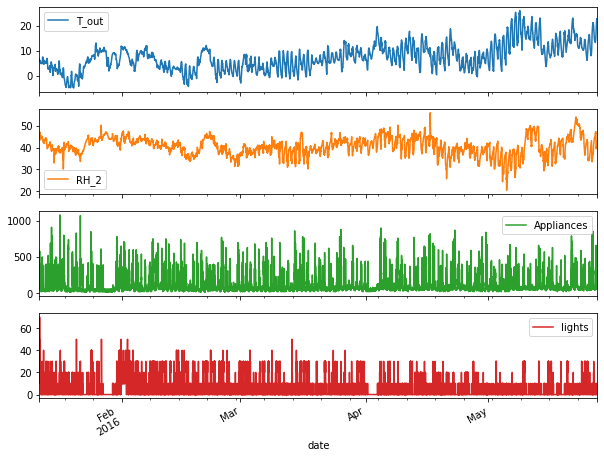

In [10]:
df.set_index('date')[['T_out', 'RH_2', 'Appliances', 'lights']].plot(subplots=True)

In [11]:
features = df[['T_out', 'RH_2', 'Appliances', 'lights']].to_numpy().tolist()
target = df['Appliances'].tolist()

In [12]:
df.count()

date           19735
Appliances     19735
lights         19735
T1             19735
RH_1           19735
T2             19735
RH_2           19735
T3             19735
RH_3           19735
T4             19735
RH_4           19735
T5             19735
RH_5           19735
T6             19735
RH_6           19735
T7             19735
RH_7           19735
T8             19735
RH_8           19735
T9             19735
RH_9           19735
T_out          19735
Press_mm_hg    19735
RH_out         19735
Windspeed      19735
Visibility     19735
Tdewpoint      19735
rv1            19735
rv2            19735
dtype: int64

In [13]:
features[0:11]

[[6.6, 44.79, 60.0, 30.0],
 [6.48333333333333, 44.7225, 60.0, 30.0],
 [6.36666666666667, 44.6266666666667, 50.0, 30.0],
 [6.25, 44.59, 50.0, 40.0],
 [6.133333333333329, 44.53, 60.0, 40.0],
 [6.01666666666667, 44.5, 50.0, 40.0],
 [5.9, 44.5, 60.0, 50.0],
 [5.91666666666667, 44.5, 60.0, 50.0],
 [5.93333333333333, 44.4333333333333, 60.0, 40.0],
 [5.95, 44.4, 70.0, 40.0],
 [5.96666666666667, 44.4, 230.0, 70.0]]

In [14]:
target[0:11]

[60, 60, 50, 50, 60, 50, 60, 60, 60, 70, 230]

In [15]:
ts_generator = TimeseriesGenerator(features, target, length=6, sampling_rate=1, batch_size=1)


In [16]:
ts_generator[0]

(array([[[ 6.6       , 44.79      , 60.        , 30.        ],
         [ 6.48333333, 44.7225    , 60.        , 30.        ],
         [ 6.36666667, 44.62666667, 50.        , 30.        ],
         [ 6.25      , 44.59      , 50.        , 40.        ],
         [ 6.13333333, 44.53      , 60.        , 40.        ],
         [ 6.01666667, 44.5       , 50.        , 40.        ]]]), array([60]))

In [17]:
len(ts_generator)

19729

In [18]:
multi_target = pd.concat([df['Appliances'], df['Appliances'].shift(-1), df['Appliances'].shift(-2)], axis=1).dropna().to_numpy().tolist()

In [19]:
multi_target[0:10]

[[60.0, 60.0, 50.0],
 [60.0, 50.0, 50.0],
 [50.0, 50.0, 60.0],
 [50.0, 60.0, 50.0],
 [60.0, 50.0, 60.0],
 [50.0, 60.0, 60.0],
 [60.0, 60.0, 60.0],
 [60.0, 60.0, 70.0],
 [60.0, 70.0, 230.0],
 [70.0, 230.0, 580.0]]

In [20]:
ts_generator = TimeseriesGenerator(features[:-2], multi_target, length=6, sampling_rate=1, batch_size=1, stride=6)